# Model Build by Jamal Talla

###  Proposed Statement:
Perform 'comprehensive Data Analysis' on a large superstore dataset to identify areas for profit optimization in retail.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde 
%matplotlib inline

C:\Users\PC\AppData\Local\Temp\ipykernel_7740\4272844999.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv("Retail-Data.csv")  
df.head(5)    

,CITY,REGION,STATE,ZIP-CODE,SEGMENT,SHIPMENT-MODE,ITEMS,SUB-ITEMS,QUANTITY,DISCOUNT,SALES,PROFIT
0,Henderson,South,KY,42420,Consumer,Second Class,Furniture,Bookcases,3,0.10,262.7600,42.9390
1,Los Angeles,West,CA,90036,Corporate,Second Class,Office Supplies,Labels,3,0.10,15.0200,7.8968
2,Fort Lauderdale,South,FL,33311,Consumer,Standard Class,Furniture,Tables,6,0.55,957.9775,-382.0056
3,Fort Lauderdale,South,FL,33311,Consumer,Standard Class,Office Supplies,Storage,3,0.30,22.7680,3.5418
4,Los Angeles,West,CA,90032,Consumer,Standard Class,Furniture,Furnishings,8,0.10,49.2600,15.1948


In [378]:
# DataFrame Summary
df.describe()       

,ZIP-CODE,QUANTITY,DISCOUNT,SALES,PROFIT
count,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000
mean,55191.657360,4.789653,0.256218,230.207797,29.663190
std,32065.043251,2.225207,0.206456,623.256048,234.264043
min,1040.000000,2.000000,0.100000,0.844000,-6598.952600
25%,23223.000000,3.000000,0.100000,17.680000,2.753400
50%,56560.000000,4.000000,0.300000,54.880000,9.687400
75%,90008.000000,6.000000,0.300000,210.340000,30.389400
max,99301.000000,15.000000,0.900000,22638.880000,8401.001400


In [379]:

df.isnull().sum()

CITY             0
REGION           0
STATE            0
ZIP-CODE         0
SEGMENT          0
SHIPMENT-MODE    0
ITEMS            0
SUB-ITEMS        0
QUANTITY         0
DISCOUNT         0
SALES            0
PROFIT           0
dtype: int64

In [380]:
df.info()           

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 0 to 9992
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CITY           9993 non-null   object 
 1   REGION         9993 non-null   object 
 2   STATE          9993 non-null   object 
 3   ZIP-CODE       9993 non-null   int64  
 4   SEGMENT        9993 non-null   object 
 5   SHIPMENT-MODE  9993 non-null   object 
 6   ITEMS          9993 non-null   object 
 7   SUB-ITEMS      9993 non-null   object 
 8   QUANTITY       9993 non-null   int64  
 9   DISCOUNT       9993 non-null   float64
 10  SALES          9993 non-null   float64
 11  PROFIT         9993 non-null   float64
dtypes: float64(3), int64(2), object(7)
memory usage: 937.0+ KB


In [381]:
df.shape

(9993, 12)

In [382]:
df.nunique()

CITY              531
REGION              4
STATE              49
ZIP-CODE          631
SEGMENT             3
SHIPMENT-MODE       4
ITEMS               3
SUB-ITEMS          17
QUANTITY           14
DISCOUNT           12
SALES            5825
PROFIT           7286
dtype: int64

In [383]:
df['ZIP-CODE'] = df['ZIP-CODE'].astype('object')

In [384]:
df.drop_duplicates(subset=None,keep='first',inplace=True)
df.duplicated().sum()

0

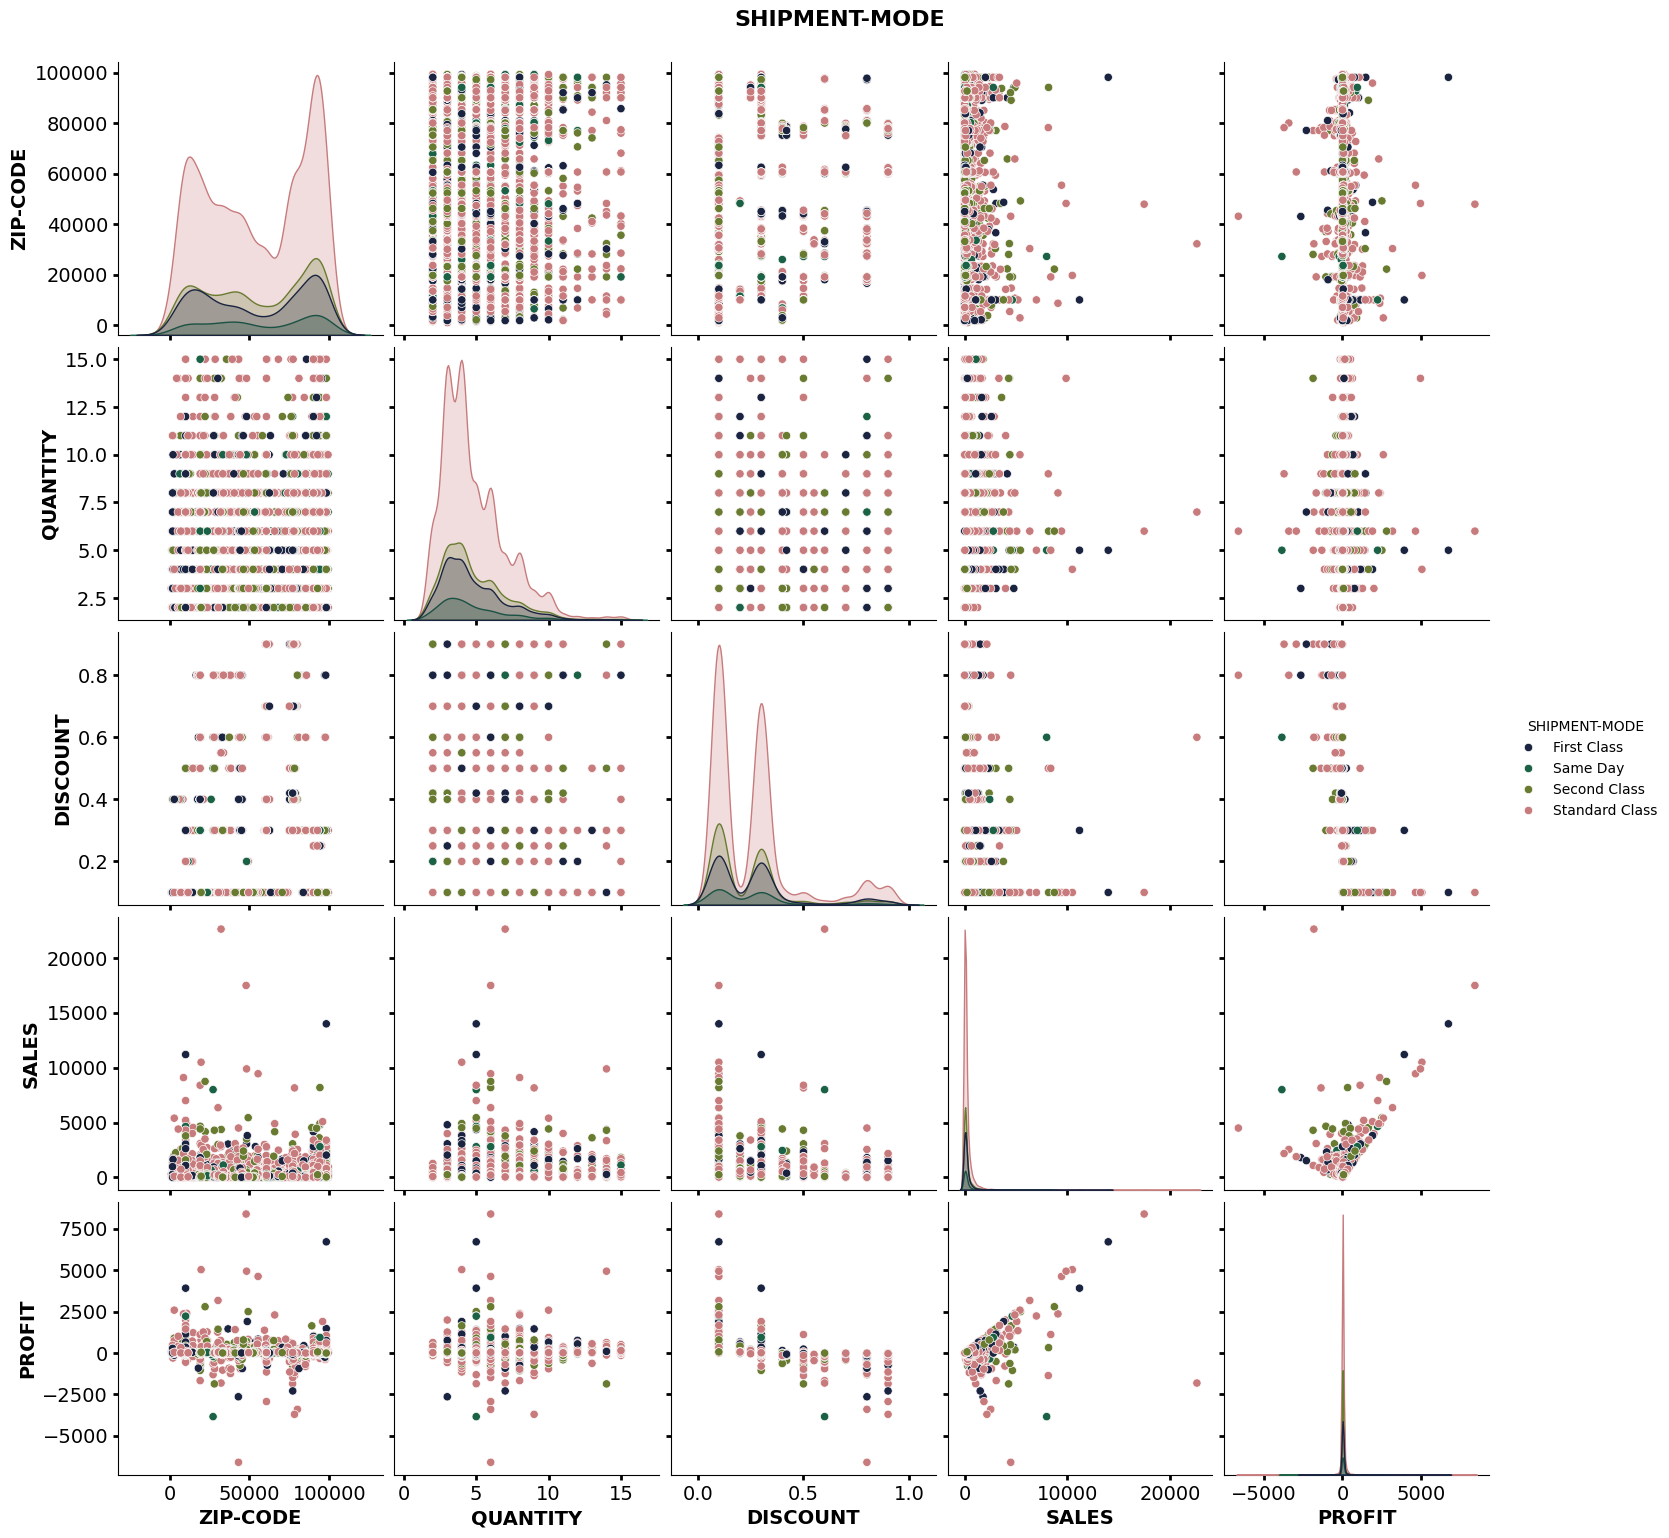

In [402]:
# Convert 'SHIPMENT-MODE' column to categorical
df['SHIPMENT-MODE'] = df['SHIPMENT-MODE'].astype('category')
blueish_palette = sns.color_palette("cubehelix")
g = sns.pairplot(df, hue='SHIPMENT-MODE', palette=blueish_palette, height=3)
g.figure.suptitle('SHIPMENT-MODE', y=1.02, fontsize=16, fontweight='bold')
plt.xlabel('X-axis Label', fontsize=16, fontweight='bold')
plt.ylabel('Y-axis Label', fontsize=16, fontweight='bold')
for ax in g.axes.flatten():
    ax.xaxis.label.set_fontsize(14)
    ax.xaxis.label.set_fontweight('bold')
    ax.yaxis.label.set_fontsize(14)
    ax.yaxis.label.set_fontweight('bold')
    ax.tick_params(axis='both', which='major', labelsize=14, width=2) 

plt.show()

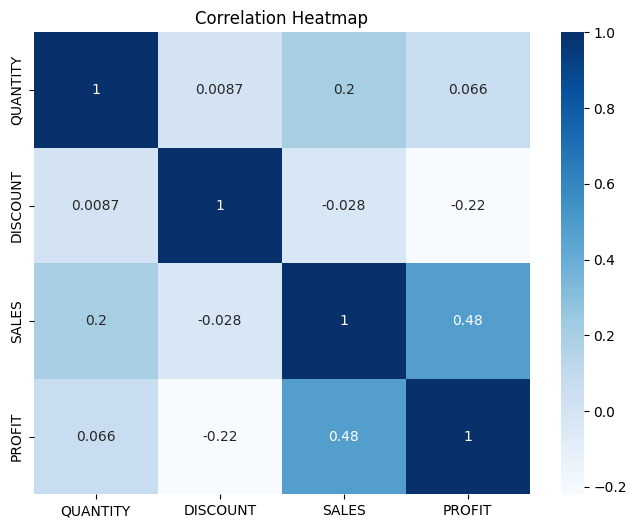

In [403]:
# Exclude non-numeric columns from correlation analysis
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [387]:
df['SHIPMENT-MODE'].value_counts()

SHIPMENT-MODE
Standard Class    5955
Second Class      1942
First Class       1537
Same Day           542
Name: count, dtype: int64

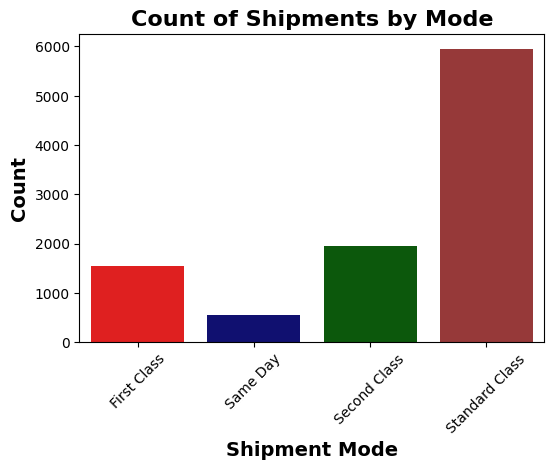

In [388]:
custom_colors = ["red", "navy", "darkgreen", "brown"]
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=df['SHIPMENT-MODE'], palette=custom_colors)
plt.title('Count of Shipments by Mode', fontsize=16, fontweight='bold') 
plt.xlabel('Shipment Mode', fontsize=14, fontweight='bold') 
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)  
plt.show()

In [389]:
df['SEGMENT'].value_counts()        

SEGMENT
Consumer       5182
Corporate      3015
Home Office    1779
Name: count, dtype: int64

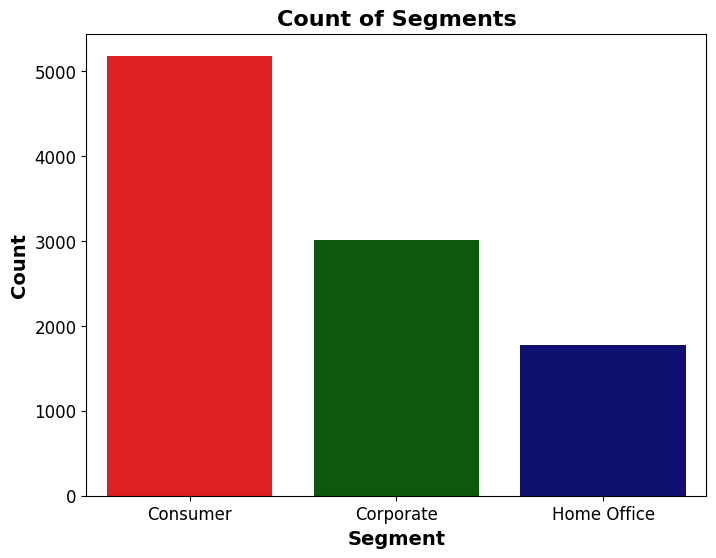

In [390]:
custom_palette = ["red", "darkgreen", "navy"]
plt.figure(figsize=(8, 6))
sns.countplot(x='SEGMENT', data=df, palette=custom_palette)
plt.title('Count of Segments', fontsize=16, fontweight='bold')  
plt.xlabel('Segment', fontsize=14, fontweight='bold')  
plt.ylabel('Count', fontsize=14, fontweight='bold')  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.show()

In [391]:
df['ITEMS'].value_counts()

ITEMS
Office Supplies    6012
Furniture          2117
Technology         1847
Name: count, dtype: int64

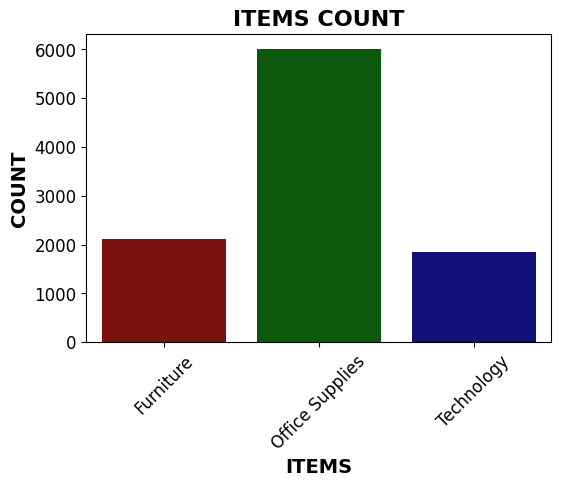

In [392]:
custom_palette = ["darkred", "darkgreen", "darkblue"]
plt.figure(figsize=(6, 4))
sns.countplot(x='ITEMS', data=df, palette=custom_palette)
plt.title('ITEMS COUNT', fontsize=16, fontweight='bold')  
plt.xlabel('ITEMS', fontsize=14, fontweight='bold')  
plt.ylabel('COUNT', fontsize=14, fontweight='bold')  
plt.xticks(fontsize=12, rotation=45)  
plt.yticks(fontsize=12)  
plt.show()

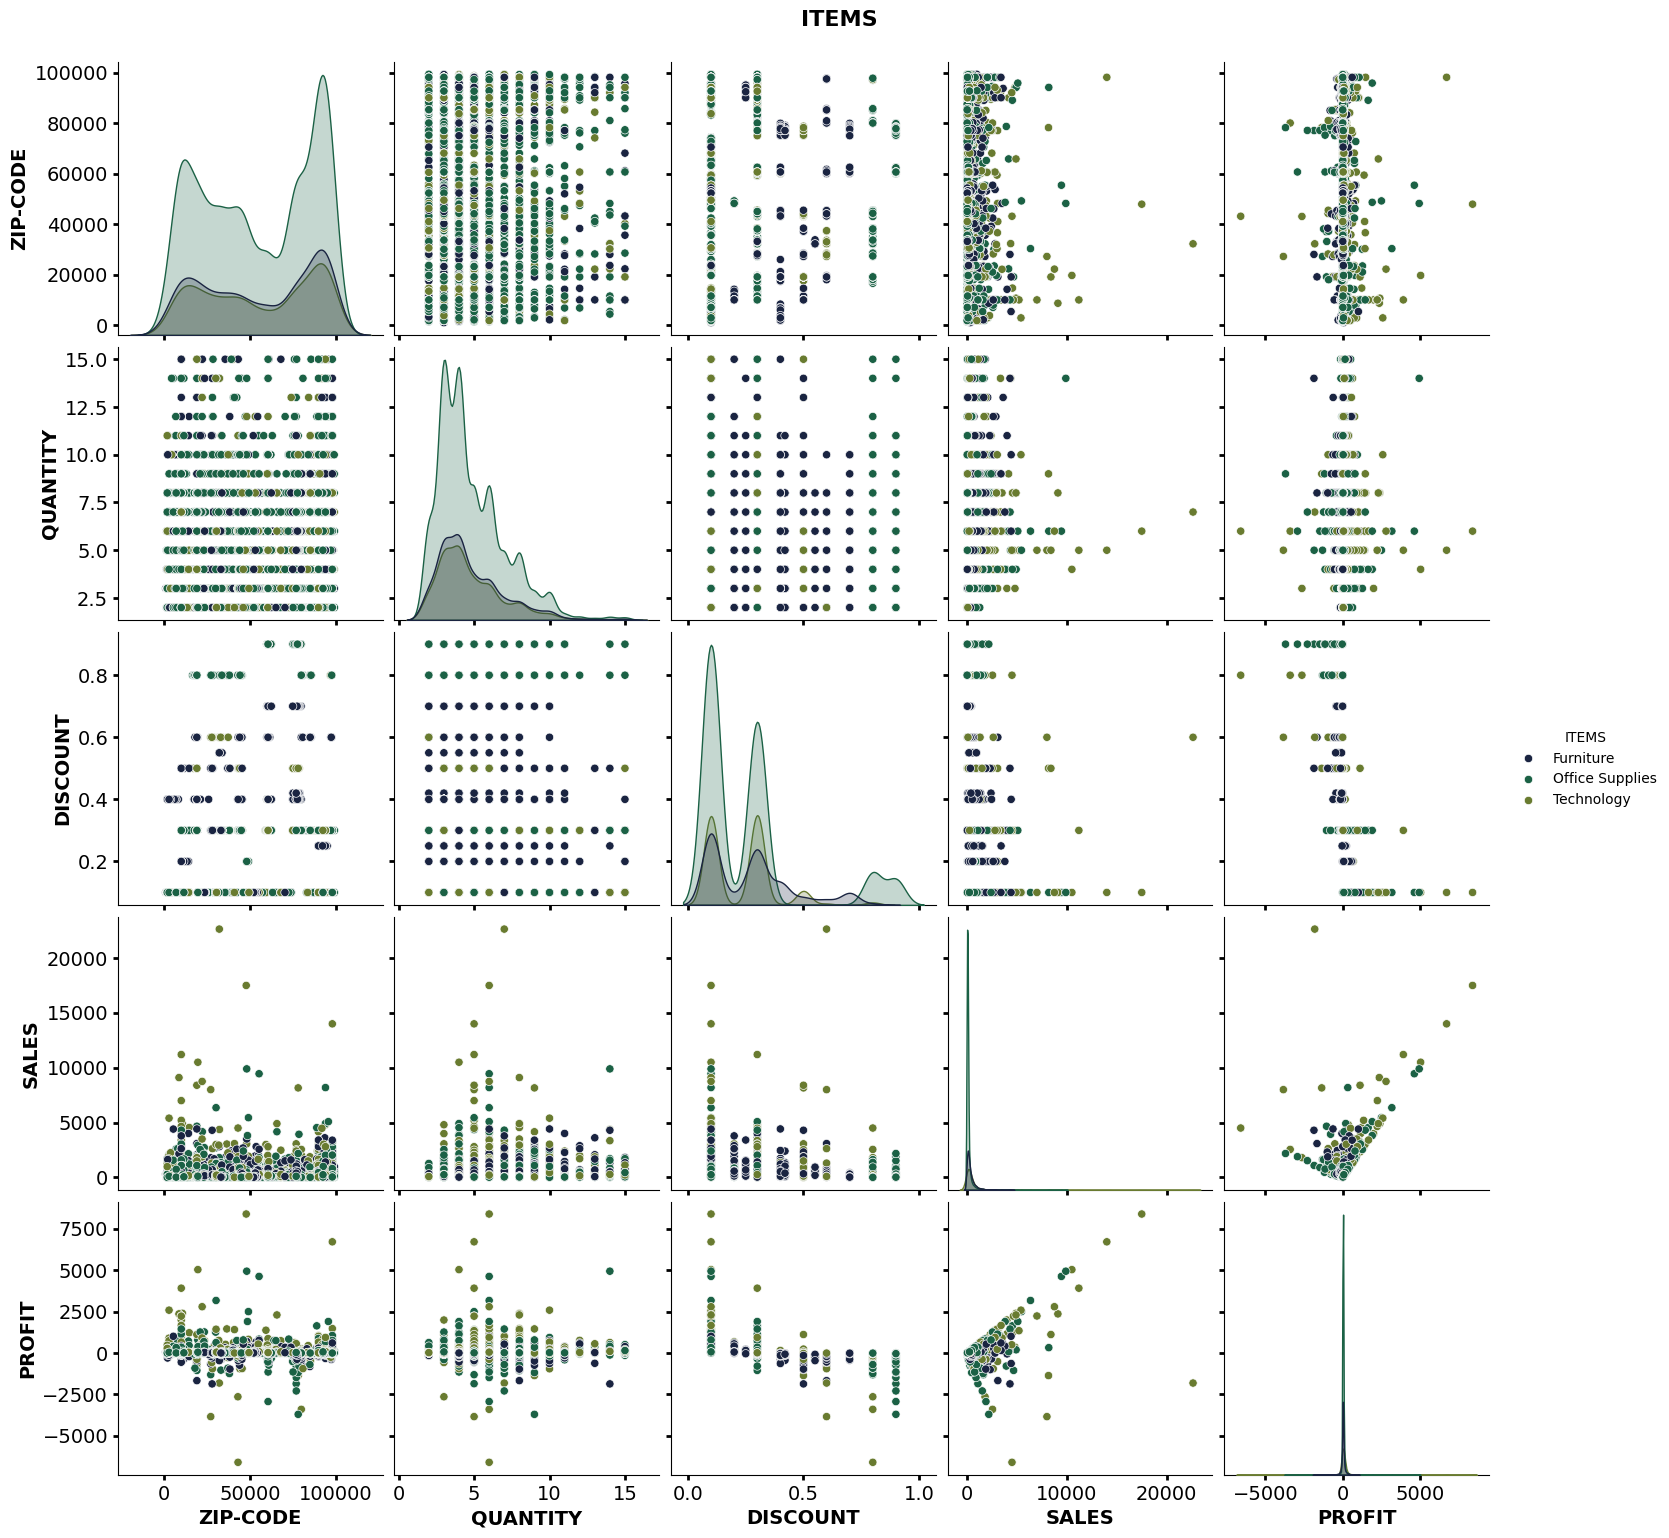

In [404]:
blueish_palette = sns.color_palette("cubehelix")
g = sns.pairplot(df, hue='ITEMS', palette=blueish_palette, height=3)
g.figure.suptitle('ITEMS', y=1.02, fontsize=16, fontweight='bold')
plt.xlabel('X-axis Label', fontsize=16, fontweight='bold')
plt.ylabel('Y-axis Label', fontsize=16, fontweight='bold')
for ax in g.axes.flatten():
    ax.xaxis.label.set_fontsize(14)
    ax.xaxis.label.set_fontweight('bold')
    ax.yaxis.label.set_fontsize(14)
    ax.yaxis.label.set_fontweight('bold')
    ax.tick_params(axis='both', which='major', labelsize=14, width=2) 
plt.show()

In [405]:
df['SUB-ITEMS'].value_counts()

SUB-ITEMS
Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          614
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: count, dtype: int64

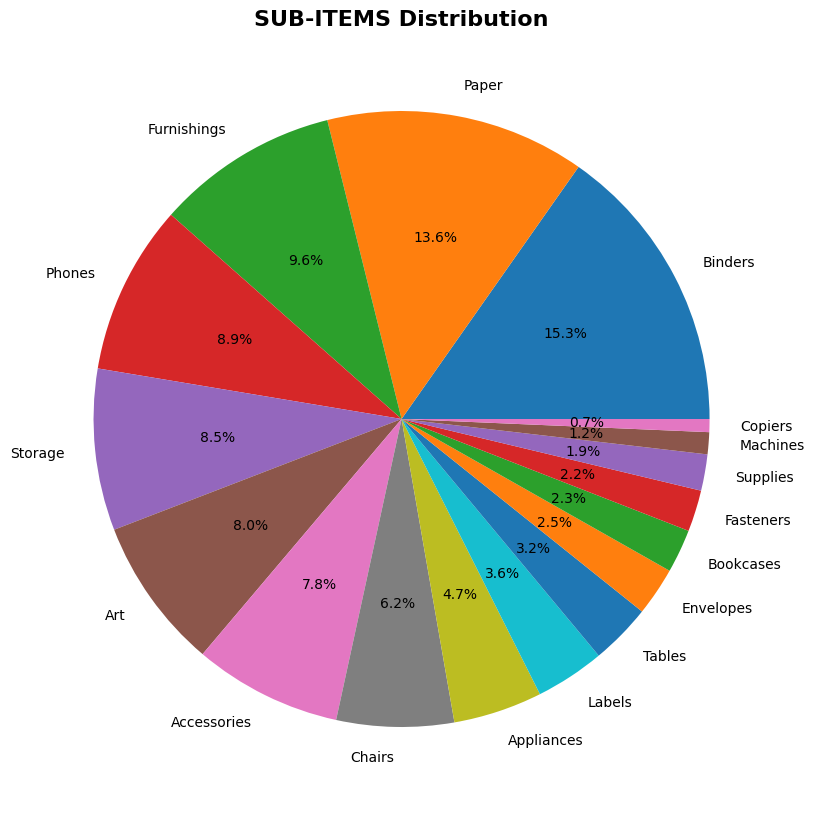

In [395]:
plt.figure(figsize=(12, 10))
pie_data = df['SUB-ITEMS'].value_counts()
pie_data.plot.pie(autopct='%1.1f%%')  
plt.title('SUB-ITEMS Distribution', fontsize=16, fontweight='bold')  
plt.ylabel(None)  
plt.show()

### NOTE 1  
The primary sales items from Binders, Paper, Furnishings, Phones, Storage, Art, and Accessories, with Copiers, Machines, and Suppliers making minimal contributions to the dataset.

In [396]:
df['STATE'].value_counts()

STATE
CA    1996
NY    1127
TX     983
PA     586
WA     502
IL     491
OH     468
FL     383
MI     254
NC     249
AZ     224
VA     224
GA     184
TN     183
CO     182
IN     149
KY     138
MA     135
NJ     130
OR     123
WI     110
MD     105
DE      96
MN      89
CT      82
OK      66
MO      66
AL      61
AR      60
RI      56
UT      53
MS      53
LA      42
SC      42
NV      39
NE      38
NM      37
IA      30
NH      27
KS      24
ID      21
MT      15
SD      12
VT      11
DC      10
ME       8
ND       7
WV       4
WY       1
Name: count, dtype: int64

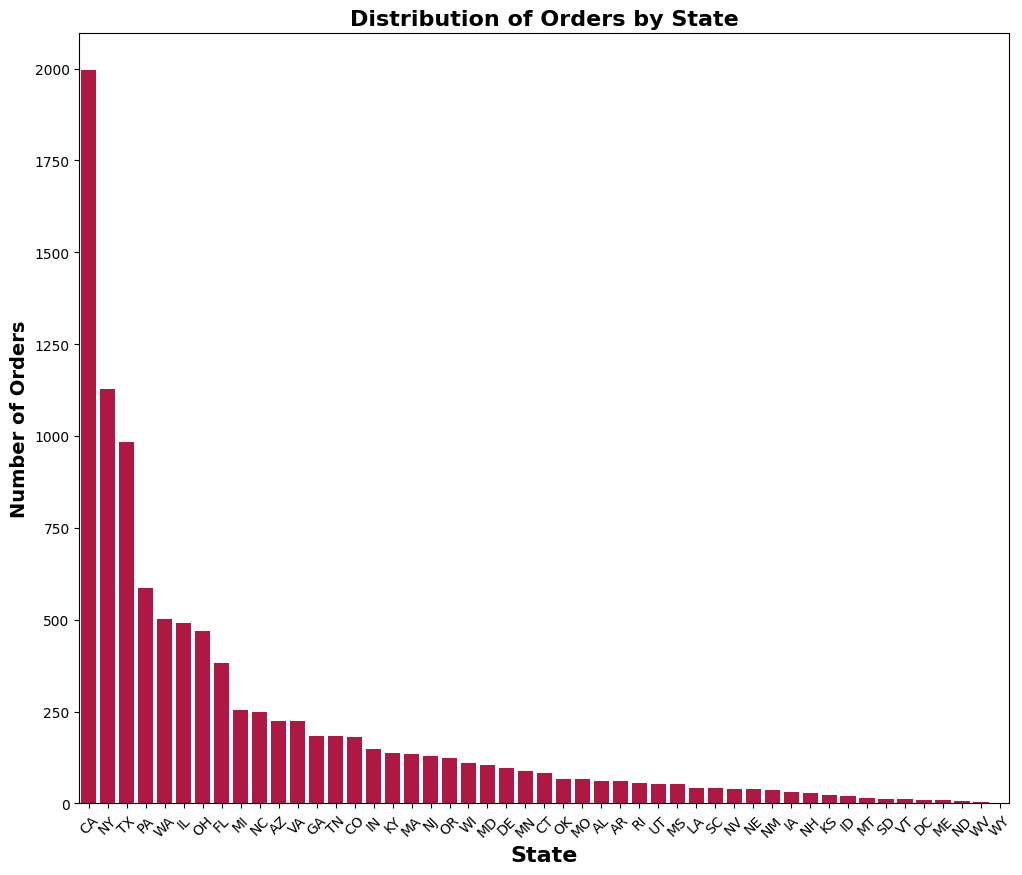

In [397]:
custom_palette = ["#C70039"]
plt.figure(figsize=(12, 10))
sns.countplot(x='STATE', data=df, palette=custom_palette, order=df['STATE'].value_counts().index)
plt.title('Distribution of Orders by State', fontsize=16, fontweight='bold')
plt.xlabel('State', fontsize=16, fontweight='bold')
plt.ylabel('Number of Orders', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### NOTE 2 <br>
The largest number of buyers hails from California and New York, while the lowest number originates from Wyoming. The prevalence of buyers in California and New York can be attributed to several factors, including their high population densities, strong economies, and cultural diversity. These states are home to major metropolitan areas and business hubs, attracting a larger pool of consumers. On the other hand, Wyoming's lower population density and rural nature may contribute to fewer buyers residing in the state.

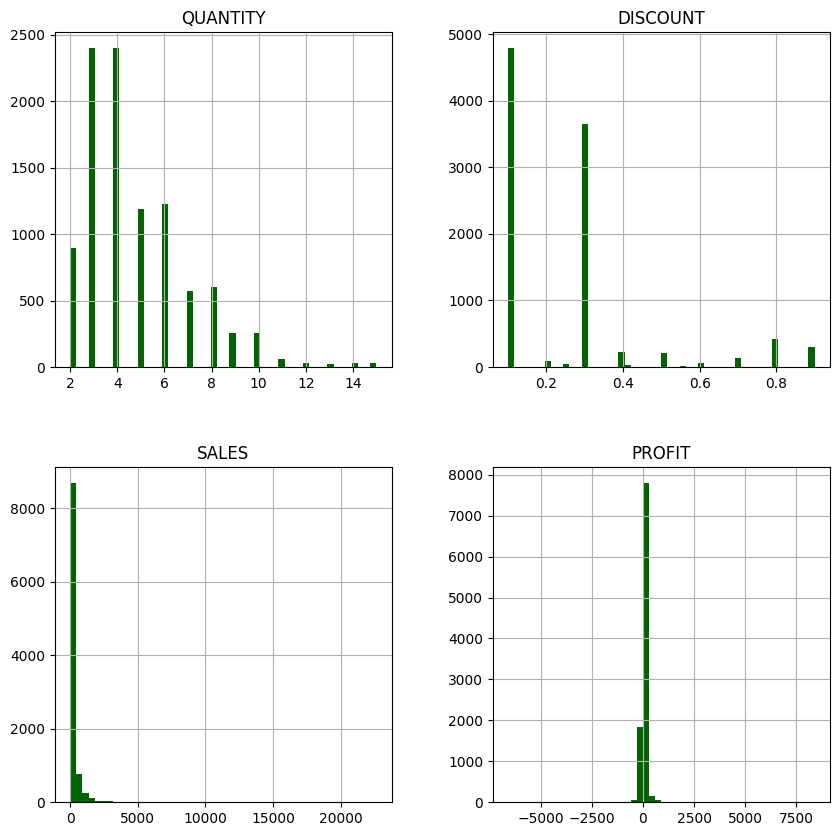

In [398]:
df.hist(figsize=(10, 10), bins=50, color='darkgreen')
plt.show()

### NOTE 3 <br>
- The majority of customers tend to purchase quantities of 3 and 4. Additionally, the highest percentage of discounts offered ranges from 0.1 to 20 percent.
The preference for purchasing quantities of 3 and 4 may stem from various factors such as convenience, affordability, or product packaging. For instance, customers might commonly buy items in pairs or small sets for household use or to meet their specific needs. As for discounts, offering discounts in the range of 0.1 to 20 percent allows businesses to attract customers without significantly compromising their profit margins. This range is often perceived as reasonable and enticing by consumers, encouraging them to make purchases while still providing a benefit to the business.



<br>

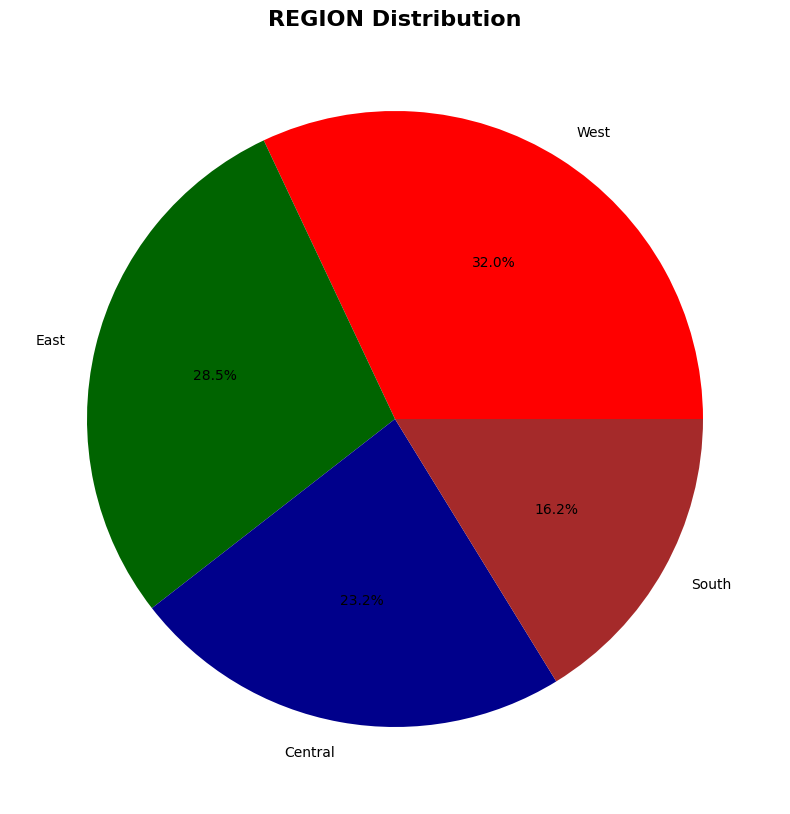

In [399]:
plt.figure(figsize=(12, 10))
pie_data = df['REGION'].value_counts()
colors = ['red', 'darkgreen', 'darkblue', 'brown']
pie_data.plot.pie(autopct='%1.1f%%', colors=colors)
plt.title('REGION Distribution', fontsize=16, fontweight='bold')
plt.ylabel(None)
plt.show()


### PROFIT/SALES

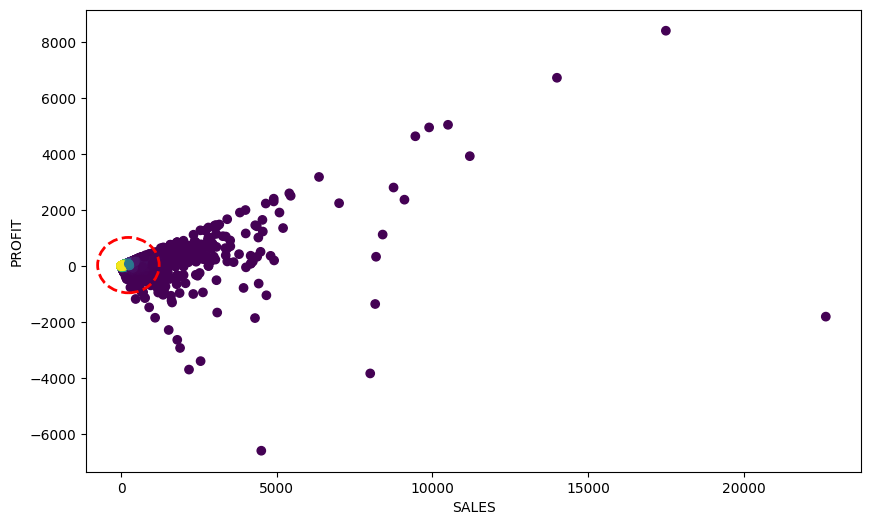

In [400]:
x = df['SALES']
y = df['PROFIT']
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)
density_threshold = 0.02  # Adjust as needed
radius = np.sqrt(-25 * np.log(density_threshold)) * 100  
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x, y, c=z, cmap='viridis')  # Color points based on density
ax.set_xlabel('SALES')
ax.set_ylabel('PROFIT')
circle = plt.Circle((np.mean(x), np.mean(y)), radius, linestyle='--', edgecolor='red', facecolor='none', linewidth=2)
ax.add_artist(circle)
plt.show()

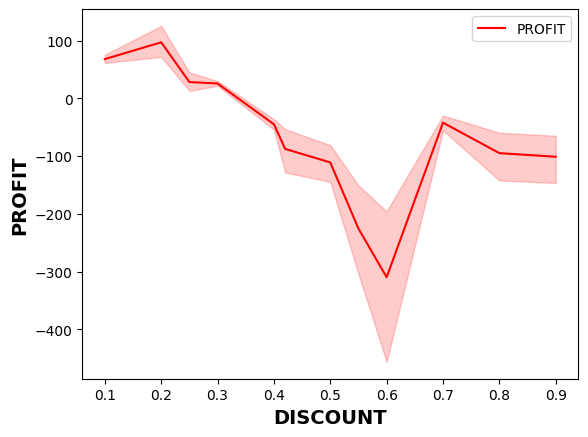

In [406]:
sns.lineplot(x='DISCOUNT', y='PROFIT', label='PROFIT', data=df, color='red')
plt.xlabel('DISCOUNT', fontsize=14, fontweight='bold')
plt.ylabel('PROFIT', fontsize=14, fontweight='bold')
plt.legend()
plt.show()

### NOTE 4 <br>
- The lack of clear correlation between profit and discount could be due to various factors. For instance, customers might prioritize other factors such as product quality, brand reputation, or convenience over discounts when making purchasing decisions. Additionally, businesses might strategically offer discounts on certain products or during specific periods to stimulate sales without directly impacting profit margins. Furthermore, individual purchasing behaviors and market dynamics can also influence the relationship between profit and discount, leading to a lack of correlation in some cases.




<br><br>

### Profit vs Quantity

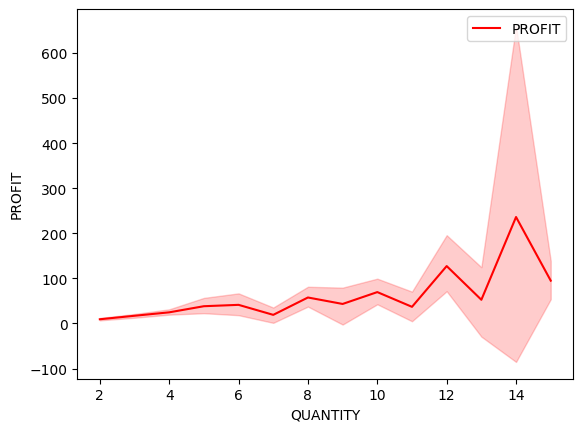

In [407]:
sns.lineplot(x='QUANTITY', y='PROFIT', label='PROFIT', data=df, color='red')
plt.legend()
plt.show()

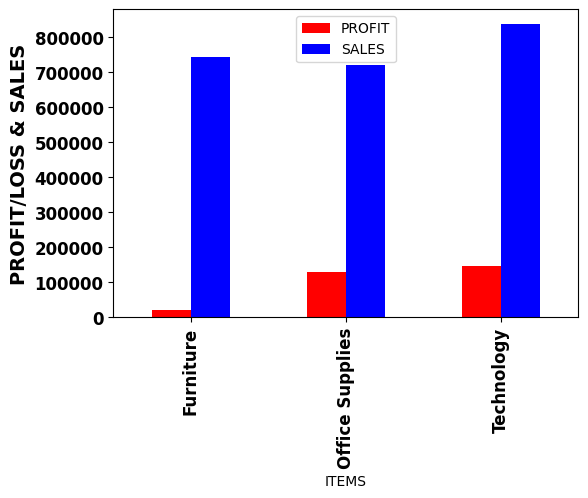

In [408]:
ax = df.groupby('ITEMS')[['PROFIT', 'SALES']].sum().plot.bar(color=['red', 'blue'], figsize=(6, 4))
plt.ylabel('PROFIT/LOSS & SALES', fontsize=14, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.show()

### NOTE 5 <br>
- Profit and sales reach their peak in consumer items, while they are at their lowest in Home Office items.
Consumer items typically represent products designed for personal use or consumption, which may include everyday household goods, electronics, and personal care items. These products often have a broader market appeal and higher demand among individual consumers, leading to increased sales and profitability.
On the other hand, Home Office items may include office supplies, furniture, and equipment primarily used in professional or business settings. These products may have a more limited target audience compared to consumer items, resulting in lower sales volumes and profitability.
Additionally, consumer items may benefit from seasonal trends, marketing strategies, and promotional activities that drive higher sales and profitability, whereas Home Office items may experience more stable demand patterns with less fluctuation in sales and profitability.

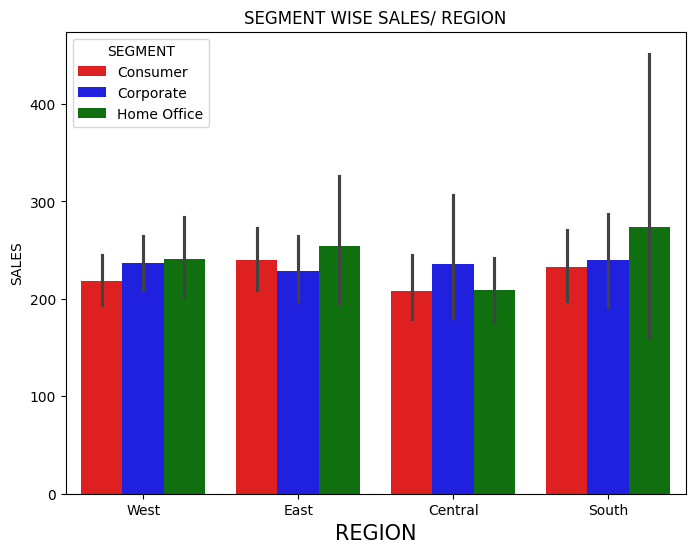

In [339]:
plt.figure(figsize=(8, 6))
plt.title('SEGMENT WISE SALES/ REGION')
sns.barplot(x='REGION', y='SALES', data=df, hue='SEGMENT', order=df['REGION'].value_counts().index, palette=['red', 'blue', 'green'])
plt.xlabel('REGION', fontsize=15)
plt.show()



### NOTE 6 <br>
- Sales across different segments show consistent patterns across all regions.
This uniformity in sales across various segments in different regions could indicate that the demand for products or services offered by these segments is relatively consistent nationwide. It might imply that consumer preferences, purchasing behaviors, or market conditions are similar across regions, leading to comparable sales performances across segments. Additionally, it could suggest that marketing strategies, product offerings, or distribution channels are effectively reaching and resonating with customers across diverse geographical areas.

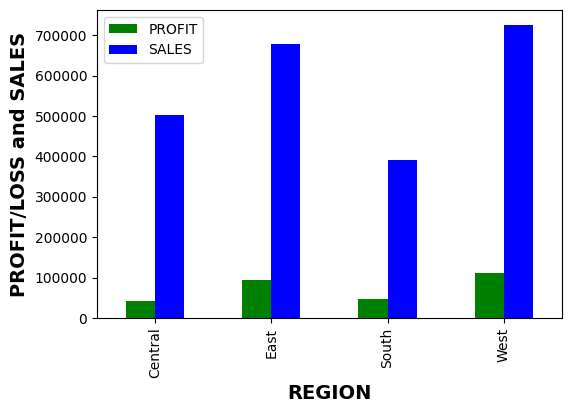

In [340]:
ax = df.groupby('REGION')[['PROFIT', 'SALES']].sum().plot.bar(color=['green', 'blue'], figsize=(6, 4))
ax.set_ylabel('PROFIT/LOSS and SALES', fontsize=14, fontweight='bold')
ax.set_xlabel('REGION', fontsize=14, fontweight='bold')
plt.show()

### NOTE 7 <br>
- Profit and sales peak in the West region, whereas they reach their lowest levels in the South region.
The West region may experience higher profit and sales due to various factors such as a larger customer base, stronger economic activity, higher disposable income levels, or specific industry concentrations favoring sales growth. This region might host major urban centers, technology hubs, or affluent residential areas, driving up demand for goods and services and resulting in higher sales and profitability.
Conversely, the South region's lower profit and sales figures could stem from factors like lower population density, slower economic growth, or less developed infrastructure. Additionally, the South region may face stronger competition, pricing pressures, or market saturation in certain industries, leading to reduced profitability and sales performance compared to other regions.

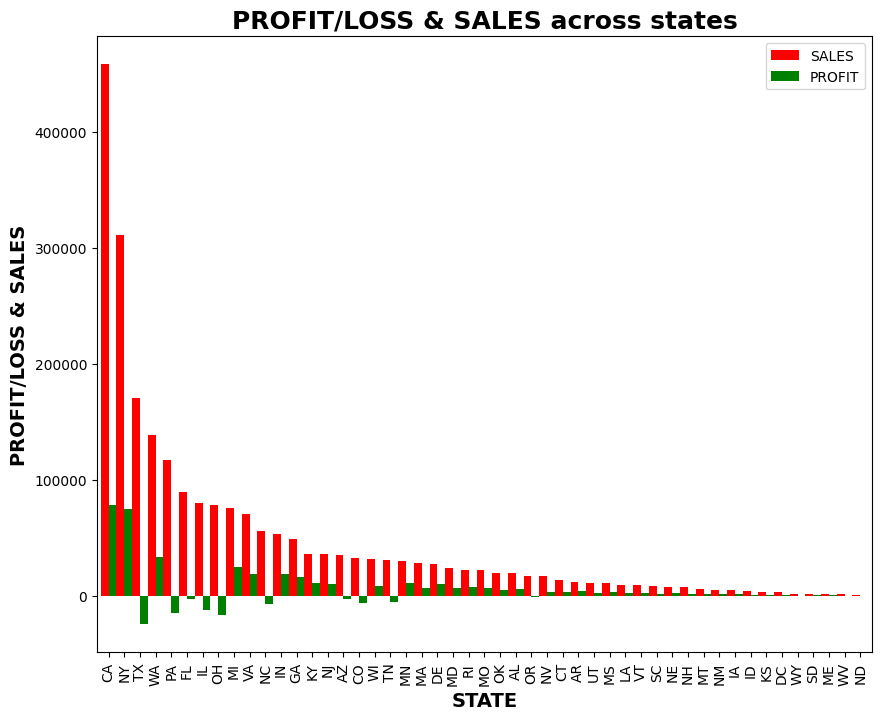

In [341]:
ps = df.groupby('STATE')[['SALES', 'PROFIT']].sum().sort_values(by='SALES', ascending=False)
ax = ps.plot.bar(color=['red', 'Green'], figsize=(10, 8), width=1)  
ax.set_title('PROFIT/LOSS & SALES across states', fontsize=18, fontweight='bold')
ax.set_xlabel('STATE', fontsize=14, fontweight='bold')
ax.set_ylabel('PROFIT/LOSS & SALES', fontsize=14, fontweight='bold')
plt.show()

### NOTE 8 <br>
- High profits are observed in California and New York, while losses are noted in Texas, Pennsylvania, and Ohio.
The high profits in California and New York could be attributed to several factors. These states are home to major economic centers such as Silicon Valley and Wall Street, respectively, which drive significant business activities and attract investments. Additionally, they have large populations and diverse industries, providing ample opportunities for businesses to thrive and generate profits.On the other hand, the losses in Texas, Pennsylvania, and Ohio may stem from various economic challenges or industry-specific issues. For example, Texas, despite being a major economic powerhouse, may experience losses due to fluctuations in the oil and gas industry, which is a significant contributor to its economy. Pennsylvania and Ohio may face similar challenges in industries such as manufacturing or coal mining, leading to decreased profitability for businesses operating in these states. Additionally, factors such as regional economic conditions, regulatory environments, and market competition could also influence profit outcomes in these regions.

In [342]:
t_states = df['STATE'].value_counts().nlargest(10)
t_states

STATE
CA    1996
NY    1127
TX     983
PA     586
WA     502
IL     491
OH     468
FL     383
MI     254
NC     249
Name: count, dtype: int64

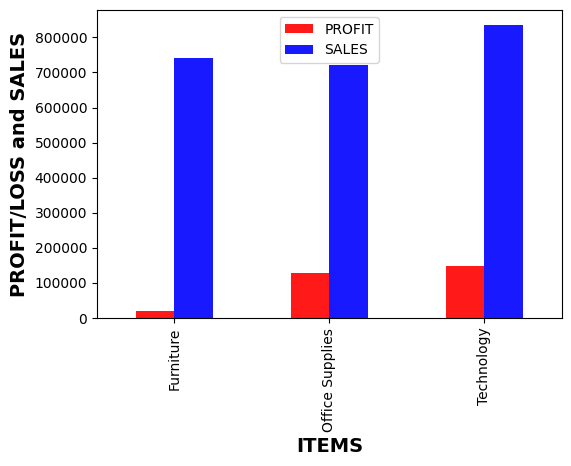

In [343]:
ax = df.groupby('ITEMS')[['PROFIT', 'SALES']].sum().plot.bar(color=['RED', 'BLUE'], alpha=0.9, figsize=(6, 4))
ax.set_ylabel('PROFIT/LOSS and SALES', fontsize=14, fontweight='bold')
ax.set_xlabel('ITEMS', fontsize=14, fontweight='bold')
plt.show()

### NOTE 9 <br>
Technology and Office Supplies exhibit high profitability, whereas Furniture demonstrates comparatively lower profits.The higher profitability of Technology and Office Supplies categories may stem from several factors. These sectors often involve products with higher profit margins, such as electronic devices, gadgets, and office equipment, which are in demand across various industries. Additionally, advancements in technology frequently lead to innovative and premium-priced products, contributing to higher profits.
On the other hand, Furniture items may have lower profit margins due to factors such as intense competition, production costs, and pricing pressure from competitors. Additionally, consumers may view furniture purchases as less frequent and discretionary, leading to lower overall sales volume and potentially reduced profitability compared to technology and office supplies.


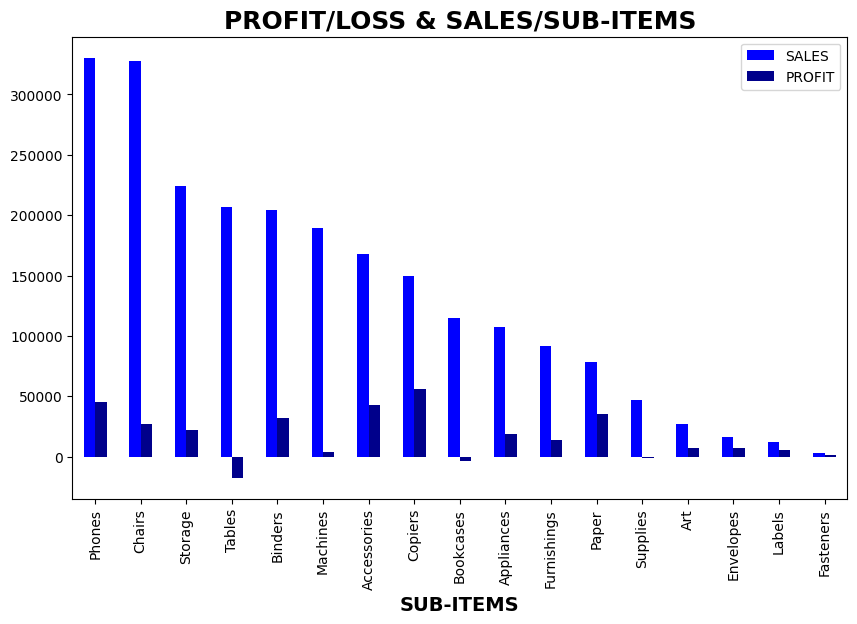

In [344]:
DF = df.groupby('SUB-ITEMS')[['SALES', 'PROFIT']].sum().sort_values(by='SALES', ascending=False)
ax = DF.plot.bar(color=['BLUE', 'darkblue'], figsize=(10, 6))
ax.set_title('PROFIT/LOSS & SALES/SUB-ITEMS', fontsize=18, fontweight='bold')
ax.set_xlabel('SUB-ITEMS', fontsize=14, fontweight='bold')
plt.show()

### NOTE 10<br>

- Phones sub-category boasts high sales, indicating strong demand. However, Chairs exhibit high sales yet yield lower profits compared to Phones. Conversely, Tables and Bookmarks sub-categories are experiencing significant losses.The high sales of Phones can be attributed to several factors. Phones are essential devices in modern life, with high demand driven by continuous technological advancements, frequent upgrades, and the integration of various features such as improved cameras, processing power, and connectivity options. Additionally, the widespread adoption of smartphones across various demographics and industries contributes to their high sales figures.Regarding Chairs, although they exhibit high sales, the lower profits compared to Phones may stem from factors such as intense competition, lower profit margins due to production costs, and pricing pressures in the furniture market. Chairs may also face challenges related to market saturation and consumer preferences, resulting in reduced profitability despite strong sales.Conversely, Tables and Bookmarks sub-categories experiencing significant losses may be encountering challenges such as declining demand, outdated designs, or insufficient market demand. These sub-categories may struggle to attract consumers or face stiff competition from alternative products, leading to reduced sales and profitability and ultimately resulting in losses.





THE END